In [308]:
import pandas as pd
import numpy as np
import argparse
import os
import glob
import random
import matplotlib.pyplot as plt
import sklearn.decomposition

In [309]:
# load annotation file
df = (pd.read_csv("annotations.csv")).dropna()

In [310]:
df

,run,event_id,Time,TR,VideoName,Event,CurrRound,Direction,dir_next,dir_prev
3,1,3,17.080850,10,level_01_10.mov,CollectedCoin,0.0,S,S,L
4,1,4,18.047428,11,level_01_10.mov,CollectedCoin,0.0,S,L,S
5,1,5,19.263901,11,level_01_10.mov,CollectedCoin,0.0,L,R,S
6,1,6,20.214619,12,level_01_10.mov,CollectedCoin,0.0,R,R,L
7,1,7,20.797427,12,level_01_10.mov,CollectedCoin,0.0,R,S,R
...,...,...,...,...,...,...,...,...,...,...
352,2,189,244.890863,162,level_02_15.mov,CollectedCoin,12.0,S,S,R
353,2,190,246.457064,163,level_02_15.mov,CollectedCoin,12.0,S,L,S
354,2,191,247.106677,163,level_02_15.mov,CollectedCoin,12.0,L,S,S
355,2,192,248.124247,164,level_02_15.mov,CollectedCoin,12.0,S,R,L


In [311]:
run_id = 2

df_run = df[df['run']==run_id]
df_run.shape
df_run

,run,event_id,Time,TR,VideoName,Event,CurrRound,Direction,dir_next,dir_prev
166,2,3,17.972981,11,level_02_15.mov,CollectedCoin,0.0,R,S,S
167,2,4,18.605519,12,level_02_15.mov,CollectedCoin,0.0,S,L,R
168,2,5,19.439077,12,level_02_15.mov,CollectedCoin,0.0,L,S,S
169,2,6,20.522131,13,level_02_15.mov,CollectedCoin,0.0,S,R,L
170,2,7,21.622257,14,level_02_15.mov,CollectedCoin,0.0,R,S,S
...,...,...,...,...,...,...,...,...,...,...
352,2,189,244.890863,162,level_02_15.mov,CollectedCoin,12.0,S,S,R
353,2,190,246.457064,163,level_02_15.mov,CollectedCoin,12.0,S,L,S
354,2,191,247.106677,163,level_02_15.mov,CollectedCoin,12.0,L,S,S
355,2,192,248.124247,164,level_02_15.mov,CollectedCoin,12.0,S,R,L


Extract frames where avatar moves left/right

In [312]:
# frames_of_interest = set()
# frame_tuples = set()

# for frame in df_run['TR'].unique():
#     dirs = set(df_run[df_run['TR'] == frame]['Direction'])
#     contains_lr = dirs & set(['L', 'R'])
#     clear_change = (len(df_run[df_run['TR'] == frame]['Direction']) > 1)


#     if (len(contains_lr) == 1) and ('S' not in dirs): 
#         frames_of_interest.add(frame)
#         frame_tuples.add((run_id, frame, list(contains_lr)[0]))

In [313]:
frames_of_interest = set()
frame_tuples = set()
for run_id in [1,2]:
    
    df_run = df[df['run']==run_id]
    
    for frame in df_run['TR'].unique():
        dirs = set(df_run[df_run['TR'] == frame]['Direction'])
        contains_lr = dirs & set(['L', 'R'])
        clear_change = (len(df_run[df_run['TR'] == frame]['Direction']) > 1)


        if (len(contains_lr) == 1) and ('S' not in dirs): 
            frames_of_interest.add(frame)
            frame_tuples.add((run_id, frame, list(contains_lr)[0]))

In [314]:
# left = set()
# right = set()
# for index, row in df_run.iterrows():
#     if row["Direction"] == 'R' and row["dir_prev"] in ['S', 'R'] and row["dir_next"] in ['S', 'R']:
#         right.add(row['TR'])
    
#     if row["Direction"] == 'L' and row["dir_prev"] in ['S', 'L'] and row["dir_next"] in ['S', 'L']:
#         left.add(row['TR']) 

# frame_tuples = [(f, 'R') for f in right]
# frame_tuples.extend([(f, 'L') for f in left])

In [315]:
# df_1[df_1['TR'].isin(frames_of_interest)]

frame_tuples

{(1, 12, 'R'),
 (1, 18, 'R'),
 (1, 24, 'R'),
 (1, 26, 'L'),
 (1, 34, 'R'),
 (1, 35, 'L'),
 (1, 36, 'R'),
 (1, 40, 'R'),
 (1, 42, 'L'),
 (1, 44, 'R'),
 (1, 45, 'L'),
 (1, 49, 'L'),
 (1, 50, 'L'),
 (1, 52, 'R'),
 (1, 53, 'L'),
 (1, 60, 'R'),
 (1, 61, 'L'),
 (1, 68, 'L'),
 (1, 70, 'R'),
 (1, 76, 'R'),
 (1, 77, 'L'),
 (1, 88, 'L'),
 (1, 90, 'L'),
 (1, 91, 'R'),
 (1, 96, 'L'),
 (1, 105, 'L'),
 (1, 106, 'L'),
 (1, 110, 'L'),
 (1, 112, 'R'),
 (1, 119, 'L'),
 (1, 121, 'R'),
 (1, 123, 'L'),
 (1, 130, 'L'),
 (1, 131, 'L'),
 (1, 135, 'R'),
 (1, 136, 'L'),
 (1, 137, 'R'),
 (1, 138, 'R'),
 (2, 11, 'R'),
 (2, 14, 'R'),
 (2, 16, 'R'),
 (2, 24, 'L'),
 (2, 25, 'R'),
 (2, 26, 'L'),
 (2, 27, 'L'),
 (2, 31, 'R'),
 (2, 45, 'R'),
 (2, 46, 'L'),
 (2, 47, 'R'),
 (2, 48, 'L'),
 (2, 50, 'R'),
 (2, 58, 'L'),
 (2, 61, 'R'),
 (2, 66, 'L'),
 (2, 68, 'L'),
 (2, 85, 'L'),
 (2, 96, 'L'),
 (2, 98, 'R'),
 (2, 106, 'R'),
 (2, 108, 'R'),
 (2, 110, 'L'),
 (2, 112, 'R'),
 (2, 123, 'L'),
 (2, 131, 'L'),
 (2, 133, 'L'),
 (2, 

In [316]:
### load data
import nibabel as nib
from nilearn.input_data import NiftiMasker
from nilearn.image import math_img
from scipy.stats import zscore
import re

def mask_ROI_cluster(ROI_nii, timeseries_nii, cluster_ind=None, do_zscore=True):
    if cluster_ind is None:
        mask_nii = math_img("img > 0", img=ROI_nii)
    else:
        mask_nii = math_img("img == {}".format(cluster_ind), img=ROI_nii)
        
    masker = NiftiMasker(mask_img=mask_nii)
    masked_timeseries = masker.fit_transform(timeseries_nii)
    
    if do_zscore:
        masked_timeseries = zscore(masked_timeseries, axis=0, nan_policy='raise')
        
    return masked_timeseries

# extract run id from nii filename
files_loaded = 0
def get_run_id(nii_file):
    run_str = re.findall('run-\d+', nii_file)
    run_id = int(run_str[0].split('-')[1])
    return run_id

## PHATE PLOTS

In [317]:
# folder_path = "/gpfs/milgram/scratch/turk-browne/elb77/Avatar/derivatives/pipeline3/sub-02"
# roi_nii_path = os.path.join(folder_path, f'navigation_native_labeled_cluster_sizes.nii.gz')

# nii_files = [
#     'sub-01_ses-01_run-01_task-viewing.nii.gz',
# #     'sub-01_ses-01_run-02_task-viewing.nii.gz',
    
# #     'sub-02_ses-01_run-01_task-viewing.nii.gz',
# #     'sub-02_ses-01_run-02_task-viewing.nii.gz',
# ]

# nii_file_paths = [os.path.join(folder_path, f) for f in nii_files]
# cluster_id = 595
# roi_nii = nib.load(roi_nii_path)

# voxel_arr = []
# labels = []

# for idx, nii_file_path in enumerate(nii_file_paths):
#     voxel_nii = nib.load(nii_file_path)
#     voxels = mask_ROI_cluster(roi_nii, voxel_nii, cluster_ind=cluster_id, do_zscore=True)
    
#     print('PCA Preprocessing...')
#     voxels = np.nan_to_num(voxels, nan=0.0)
#     pca_operator = sklearn.decomposition.PCA(n_components=50)
#     voxels = pca_operator.fit_transform(voxels)
    
#     voxel_arr.append(voxels)

#     run_id = get_run_id(nii_file_path)
#     run_labels = [run_id] * voxels.shape[0]
#     labels.extend(run_labels)
#     print(f'Run ID: {run_id} -- {voxels.shape}') 

# dataset = np.concatenate(voxel_arr, axis=0)

In [318]:
# plt.figure(figsize=(18, 20))
# plt.imshow(dataset[:3,:])

In [319]:
# import phate

# def phate_2d(arr_2d, frame_tuples):
#     plt.figure(figsize=(12,10))
#     plt.scatter(arr_2d[:,0], arr_2d[:,1], c=list(range(arr_2d.shape[0])), cmap='gray', vmin=0, vmax=arr_2d.shape[0])
    
#     for idx, direction in frame_tuples:
#         if direction == 'R':
#             plt.plot(arr_2d[idx,0], arr_2d[idx,1], marker = 'o', color='cyan')
#         else:
#             plt.plot(arr_2d[idx,0], arr_2d[idx,1], marker = 'o', color='magenta')
            
#     plt.colorbar()
#     plt.show()

# def phate_3d(arr_3d, frame_tuples, rotation=0):
#     fig = plt.figure(figsize=(12,10))
#     ax = fig.add_subplot(111, projection='3d')
#     plot = ax.scatter(arr_3d[:,0], arr_3d[:,1], arr_3d[:,2], 
#                       c=list(range(arr_3d.shape[0])), cmap='gray', vmin=0, vmax=arr_3d.shape[0])
    
#     for idx, direction in frame_tuples:
#         if direction == 'R':
#             plt.plot(arr_3d[idx,0], arr_3d[idx,1], arr_3d[idx,2], marker = 'o', color='cyan')
#         else:
#             plt.plot(arr_3d[idx,0], arr_3d[idx,1], arr_3d[idx,2], marker = 'o', color='magenta')

#     ax.view_init(30, rotation)
#     plt.colorbar(plot)
#     plt.show()

In [320]:
# phate_operator = phate.PHATE()
# phate_emb2 = phate_operator.fit_transform(dataset)

In [321]:
# phate_2d(phate_emb2, frame_tuples)

In [322]:
# phate_operator.set_params(n_components=3)
# phate_emb3 = phate_operator.transform()

In [323]:
# phate_3d(phate_emb3, frame_tuples, rotation=30)

## TPHATE

In [324]:
import os
import numpy as np
import nibabel as nib
import pickle
import phate
import scprep
import scipy
import sklearn.manifold
import sklearn.decomposition
import mds
from sklearn.manifold import MDS
import itertools
# import umap
import matplotlib.pyplot as plt

In [325]:
def generate_transition_op(n_timepoints, k):
    A = np.zeros((n_timepoints, n_timepoints))
    
    norm_factor = sum([np.e**(-k) for k in range(1, k)])
    
    for i in range(n_timepoints):
        connected_f = list(range(i + 1, min(n_timepoints, i + k + 1)))
        connected_b = list(range(max(0, i - k), i))
        for j in connected_b + connected_f:
            A[j, i] = np.e**(-np.abs(i - j))
  
    P = A / np.sum(A, axis=0)
    return P

def tphate(data, t, k, n_components, mds_alg='smacof'):
    print("generating transition diffusion operator...")
    P_transition = generate_transition_op(data.shape[0], k)

    print("generated PHATE diffusion operator...")
    phate_op = phate.PHATE(n_jobs=-1, verbose=0)
    phate_op.fit(data)
    diff_op = np.matrix(phate_op.diff_op)
 
    P = np.matmul(diff_op.T, P_transition)
    K = np.linalg.matrix_power(P, t)
    K = np.log(K + 1e-7)
    K = np.nan_to_num(K, nan=0.0).T
    
    print(n_components)

    print("running MDS...")
    embedding = mds.embed_MDS(K, ndim=n_components, how='metric', n_jobs=-1, solver=mds_alg)
    
#     mds = sklearn.manifold.MDS(n_components=n_components, metric=True, n_jobs=-1)
#     embedding = mds.fit_transform(K)
    
    
    return embedding, P

In [326]:
folder_path = "/gpfs/milgram/scratch/turk-browne/elb77/Avatar/derivatives/pipeline3/sub-01"
roi_nii_path = os.path.join(folder_path, f'navigation_native_labeled_cluster_sizes.nii.gz')

nii_files = [
    'sub-01_ses-01_run-01_task-viewing.nii.gz',
#     'sub-01_ses-01_run-02_task-viewing.nii.gz',
    
#     'sub-02_ses-01_run-01_task-viewing.nii.gz',
#     'sub-02_ses-01_run-02_task-viewing.nii.gz',
]

nii_file_paths = [os.path.join(folder_path, f) for f in nii_files]
cluster_id = 120
roi_nii = nib.load(roi_nii_path)

voxel_arr = []
labels = []

for idx, nii_file_path in enumerate(nii_file_paths):
    voxel_nii = nib.load(nii_file_path)
    voxels = mask_ROI_cluster(roi_nii, voxel_nii, cluster_ind=cluster_id, do_zscore=True)
    
    print('PCA Preprocessing...')
    voxels = np.nan_to_num(voxels, nan=0.0)
    pca_operator = sklearn.decomposition.PCA(n_components=100)
    voxels = pca_operator.fit_transform(voxels)
    
    voxel_arr.append(voxels)

    run_id = get_run_id(nii_file_path)
    run_labels = [run_id] * voxels.shape[0]
    labels.extend(run_labels)
    print(f'Run ID: {run_id} -- {voxels.shape}') 

fmri = np.concatenate(voxel_arr, axis=0)

PCA Preprocessing...
Run ID: 1 -- (173, 100)


In [327]:
fmri.shape

(173, 100)

generating transition diffusion operator...
generated PHATE diffusion operator...
20
running MDS...
computing first eigenvector of P


<Axes3DSubplot:title={'center':'Run 1 T-PHATE Diff Op Eigenvector'}, xlabel='T-PHATE1', ylabel='T-PHATE2'>

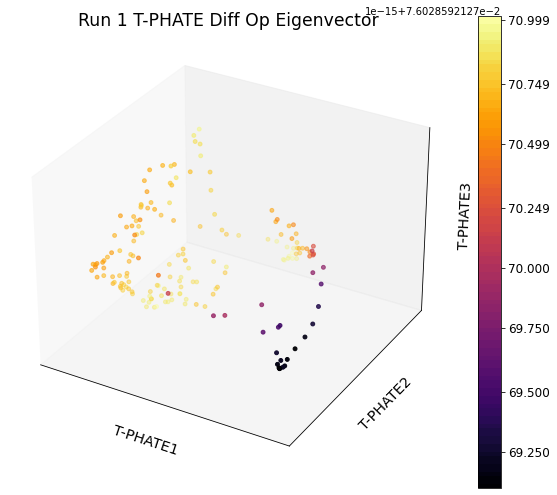

In [328]:
embedding, P = tphate(fmri, 10, 5, 20)

print('computing first eigenvector of P')
w, v = scipy.sparse.linalg.eigs(P.T, k=1, which='LM')
v = np.real(v)

plot_title = f"Run 1 T-PHATE Diff Op Eigenvector"
# plot_filename = f"plots/{patient_id}_timeseries_tphate.png"
scprep.plot.scatter3d(embedding,
                      c=v[:,0],
                      title=plot_title,
#                       filename=plot_filename,
                      s=15,
                      ticks=False,
                      label_prefix="T-PHATE",
                      figsize=(8,7))

In [329]:
# match direction tuples with fmri embeddings
outputs = np.full((embedding.shape[0], 1), -1)
dataset = embedding
# dataset = np.append(embedding, v, axis=1)
dataset = np.append(dataset, outputs, axis=1)

In [330]:
embedding.shape

(173, 20)

In [331]:
len_run_1 = len([x for x in labels if x==1])
len_run_1

173

In [332]:
for frame_tuple in frame_tuples:
    run_id, idx, direct = frame_tuple
    if run_id == 2:
#         idx += len_run_1
        continue
        
    if direct == 'L':
        dataset[idx, -1] = 0
    elif direct == 'R':
        dataset[idx, -1] = 1

In [333]:
# extract embeddings of interest 
mask = dataset[:, -1] != -1
masked_data = dataset[mask]

In [334]:
X = masked_data[:, :-1]
y = masked_data[:, -1]

In [335]:
## prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# X_train, X_test = X[:38], X[38:]
# y_train, y_test = y[:38], y[38:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [336]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [337]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [338]:
pred = clf.predict(X_test)
pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.])

In [339]:
y_test

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.])

In [340]:
# accuracy
np.count_nonzero(pred == y_test) / y_test.shape[0]

0.5